In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df['math score'].describe()

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


In [6]:
df['reading score'].describe()

,reading score
count,1000.000000
mean,69.169000
std,14.600192
min,17.000000
25%,59.000000
50%,70.000000
75%,79.000000
max,100.000000


In [7]:
df['writing score'].describe()

,writing score
count,1000.000000
mean,68.054000
std,15.195657
min,10.000000
25%,57.750000
50%,69.000000
75%,79.000000
max,100.000000


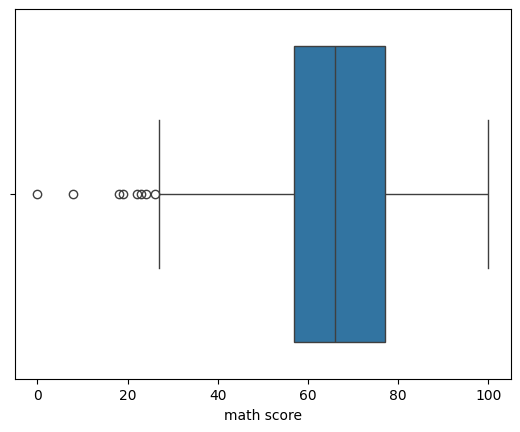

In [8]:
sns.boxplot(x= df['math score'])
plt.show()

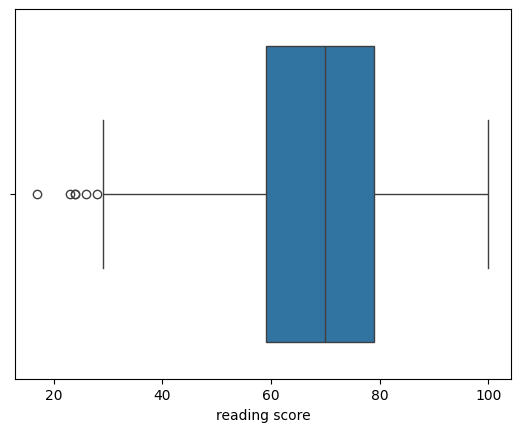

In [9]:
sns.boxplot(x= df['reading score'])
plt.show()

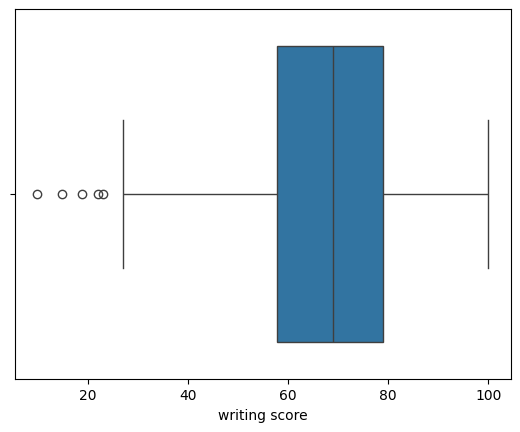

In [10]:
sns.boxplot(x= df['writing score'])
plt.show()

In [11]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound  = Q3 + 1.5*IQR

In [12]:
print(f"IQR = {IQR}")
print(f"lower_bound = {lower_bound}")
print(f"upper_bound = {upper_bound}")

IQR = 20.0
lower_bound = 27.0
upper_bound = 107.0


In [13]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound  = Q3 + 1.5*IQR

print(f"IQR = {IQR}")
print(f"lower_bound = {lower_bound}")
print(f"upper_bound = {upper_bound}")

IQR = 20.0
lower_bound = 29.0
upper_bound = 109.0


In [14]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound  = Q3 + 1.5*IQR

print(f"IQR = {IQR}")
print(f"lower_bound = {lower_bound}")
print(f"upper_bound = {upper_bound}")

IQR = 21.25
lower_bound = 25.875
upper_bound = 110.875


In [15]:
df = df[(df['math score']>=lower_bound) & (df['math score']<=upper_bound)]

In [16]:
df.shape

(993, 8)

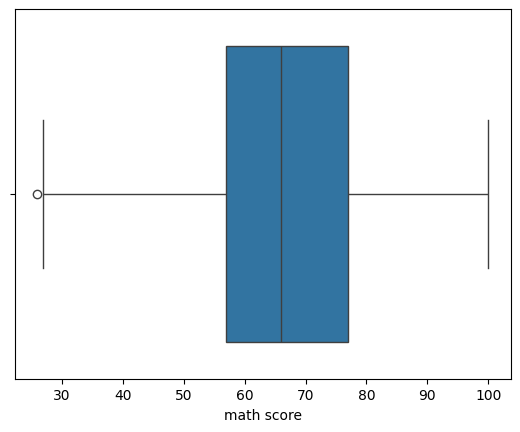

In [17]:
sns.boxplot(x= df['math score'])
plt.show()

In [18]:
df = df[(df['reading score']>=lower_bound ) & (df['reading score']<=upper_bound)]

In [19]:
df.shape

(991, 8)

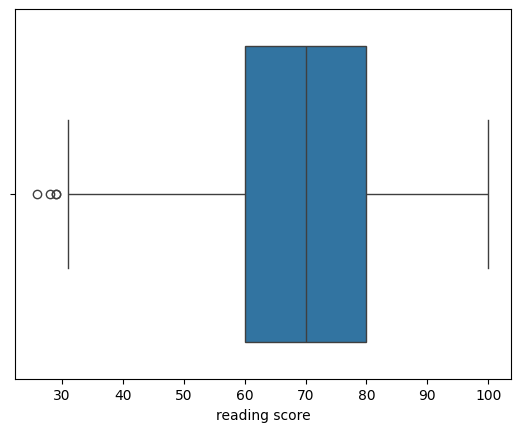

In [20]:
sns.boxplot(x= df['reading score'])
plt.show()

In [21]:
df = df[(df['writing score']>=lower_bound) & (df['writing score']<=upper_bound)]

In [22]:
df.shape

(990, 8)

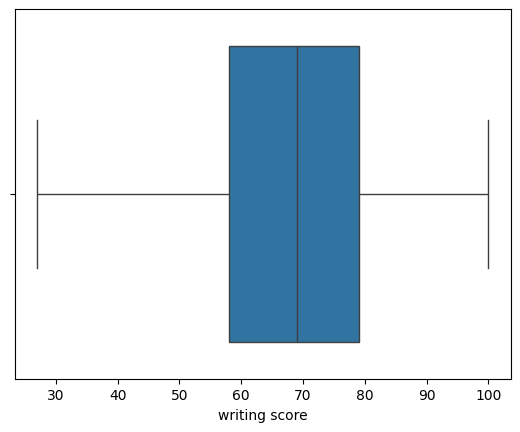

In [23]:
sns.boxplot(x= df['writing score'])
plt.show()

## **Check Distribution and Skewness:**

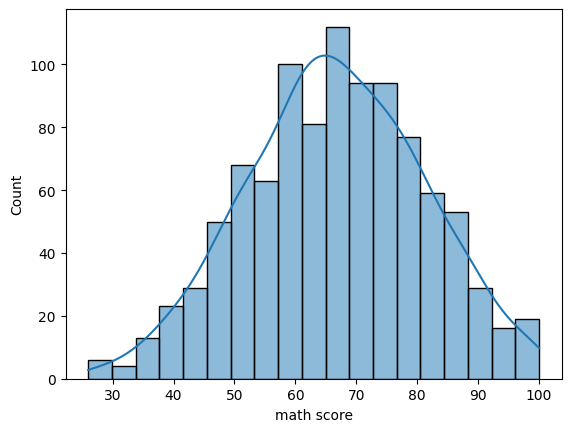

In [24]:
sns.histplot(df['math score'], kde = True)
plt.show()

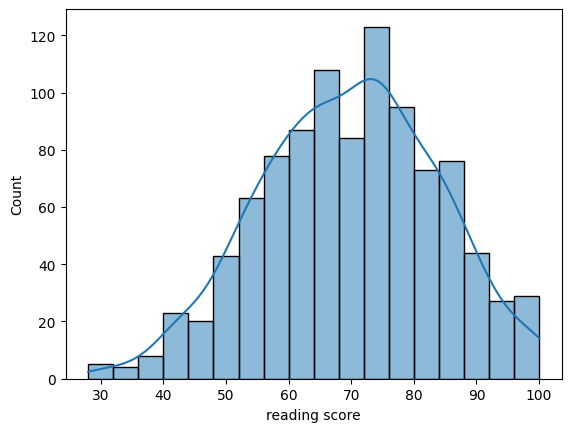

In [25]:
sns.histplot(df['reading score'], kde= True)
plt.show()

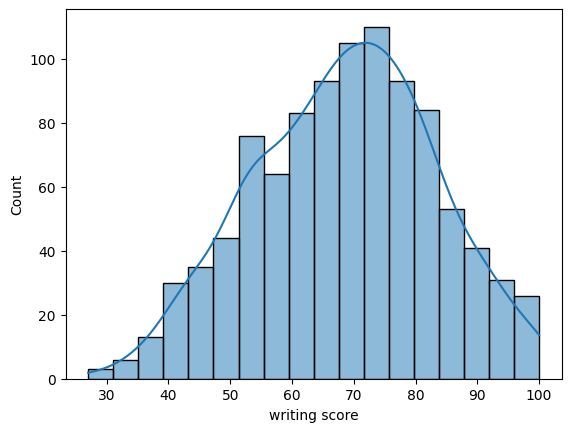

In [26]:
sns.histplot(df['writing score'], kde= True)
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       990 non-null    object
 1   race/ethnicity               990 non-null    object
 2   parental level of education  990 non-null    object
 3   lunch                        990 non-null    object
 4   test preparation course      990 non-null    object
 5   math score                   990 non-null    int64 
 6   reading score                990 non-null    int64 
 7   writing score                990 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.6+ KB


In [28]:
skewness = skew(df['math score'])
print(f"skewness of math score: {skewness}")

skewness of math score: -0.05604561749429327


In [29]:
skewness = skew(df['reading score'])
print(f"skewness of reading score: {skewness}")

skewness of reading score: -0.13464963827424073


In [30]:
skewness = skew(df['writing score'])
print(f"skewness of writing score: {skewness}")

skewness of writing score: -0.1242623983056354


In [31]:
df['math score'] = np.log10(df['math score'])
df['math score']

,math score
0,1.857332
1,1.838849
2,1.954243
3,1.672098
4,1.880814
...,...
995,1.944483
996,1.792392
997,1.770852
998,1.832509


<Axes: xlabel='math score', ylabel='Density'>

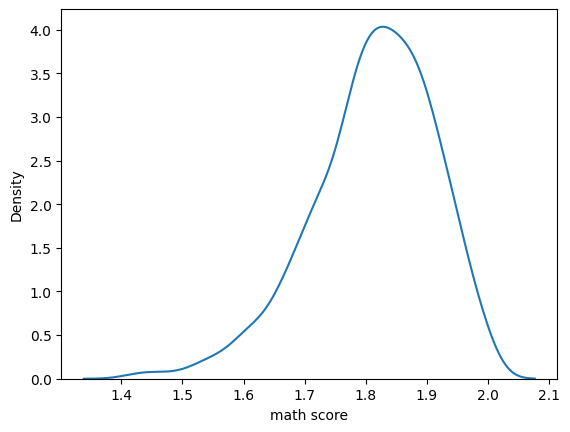

In [32]:
sns.kdeplot(x= df['math score'])

In [33]:
df['reading score'] = np.log10(df['reading score'])
df['reading score']

,reading score
0,1.857332
1,1.954243
2,1.977724
3,1.755875
4,1.892095
...,...
995,1.995635
996,1.740363
997,1.851258
998,1.892095


<Axes: xlabel='reading score', ylabel='Density'>

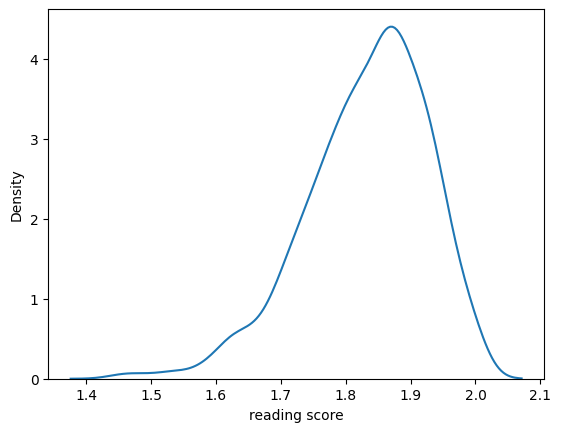

In [34]:
sns.kdeplot(x= df['reading score'])

In [35]:
df['writing score'] = np.log10(df['writing score'])
df['writing score']

,writing score
0,1.869232
1,1.944483
2,1.968483
3,1.643453
4,1.875061
...,...
995,1.977724
996,1.740363
997,1.812913
998,1.886491


<Axes: xlabel='writing score', ylabel='Density'>

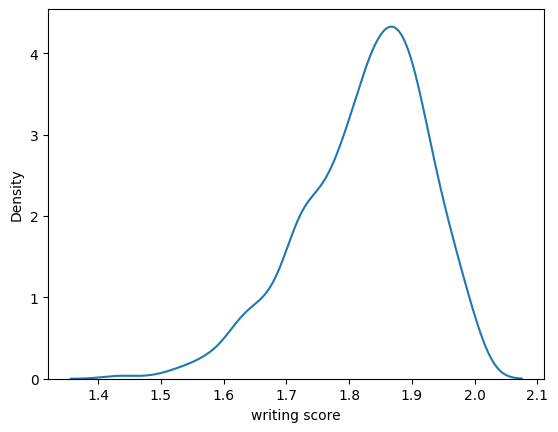

In [36]:
sns.kdeplot(x= df['writing score'])

## **Hypothesis Testing**

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,1.857332,1.857332,1.869232
1,female,group C,some college,standard,completed,1.838849,1.954243,1.944483
2,female,group B,master's degree,standard,none,1.954243,1.977724,1.968483
3,male,group A,associate's degree,free/reduced,none,1.672098,1.755875,1.643453
4,male,group C,some college,standard,none,1.880814,1.892095,1.875061


In [38]:
df.shape

(990, 8)

**Null Hypothesis (H₀):** There is no difference in the mean math scores between students who completed the test preparation course and those who did not.

**Alternative Hypothesis (H₁):** There is a difference in the mean math scores between students who completed the test preparation course and those who did not.

H₀: μ_Completed = μ_None
H₁: μ_Completed ≠ μ_None

 The significance level (α) is the probability of rejecting the null hypothesis (H₀) when it is actually true

 For this hypothesis test, we will choose a common significance level of:
                 𝛼=0.05

 This means that there is a 5% risk of concluding that the test preparation course has an effect on math scores


In [39]:
course_completed = df[df['test preparation course']=='completed']['math score']
none_completed = df[df['test preparation course']=='none']['math score']

In [40]:
t_stat, p_value = stats.ttest_ind(course_completed, none_completed, equal_var=False)

print(f'T-Statistics:{t_stat:.2f}')
print(f'P-Value:{p_value:.4f}')

T-Statistics:5.40
P-Value:0.0000


## Interpretation:
 The t-statistic of 5.40 suggests there is a large difference between the means of the two groups.

 The p-value of 0.0000 is much smaller than the significance level α = 0.05, which indicates strong evidence against the null hypothesis.

# Reject or Fail to Reject the Null Hypothesis (H₀):
###  **From the test Results:**
              T-Statistic: 5.40
              P-Value: 0.0000
             

### **Decision:**


Since the p-value (0.0000) is much smaller than the chosen significance level of α = 0.05,  we reject the null hypothesis (H₀).
This indicates that there is strong statistical evidence that the mean math scores of students who completed the test preparation course are different from those who did not.

# Implications of the Decision:



1.   Rejecting the null hypothesis implies that the test preparation course had a statistically significant impact on students' math scores.
2.   It is likely that students who completed the course performed better in math compared to those who did not.



